In [20]:
# Reading the csv file
data = pd.read_csv('RFLFSODataFull.csv')

In [21]:
# Group by SYNOPCode and count the number of rows in each group
synop_group_data = data.groupby('SYNOPCode').size()

# Display the number of rows in each group
print(synop_group_data)

SYNOPCode
0    56964
3      191
4      466
5     6605
6    25018
7      419
8     1716
dtype: int64


In [27]:
import pandas as pd

# Function to downsample data for large SYNOPCode groups
def downsample_synop_data(group, target_size=120):
    # Round the 'Distance' and group by rounded distance and time
    group['Rounded_Distance'] = group['Distance'].round()
    sampled_data = group.groupby(['Rounded_Distance', 'Time']).apply(
        lambda g: g.sample(min(2, len(g)))  # Randomly sample up to 5 records from each group
    )
    return sampled_data.reset_index(drop=True)

# Main downsampling process
def process_data(data, threshold=1000):
    # Initialize an empty DataFrame for results
    downsampled_df = pd.DataFrame()

    # Process each SYNOPCode group
    for code, group in data.groupby('SYNOPCode'):
        if len(group) <= threshold:  # Small dataset
            downsampled_df = pd.concat([downsampled_df, group], ignore_index=True)
        else:  # Large dataset
            downsampled_df = pd.concat([downsampled_df, downsample_synop_data(group)], ignore_index=True)

    return downsampled_df

# Apply the function to the dataset
downsampled_data = process_data(data)


C:\Users\Jitendra Sharma\AppData\Local\Temp\ipykernel_17492\2482612708.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = group.groupby(['Rounded_Distance', 'Time']).apply(
C:\Users\Jitendra Sharma\AppData\Local\Temp\ipykernel_17492\2482612708.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = group.groupby(['Rounded_Distance', 'Time']).apply(
C:\Users\Jitendra Sharma\AppData

In [28]:
#  Drop a Rounded_Distance column
downsampled_data = downsampled_data.drop('Rounded_Distance', axis=1)

In [24]:
downsampled_data

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,3.578902,11.358302,3.230685,3.465755,3.134218,2012.282241,83500000000,0.000000,0.000000,0.000000,...,4.234988,3.736061,0,31496.118660,33161.180772,30669.332758,105.901528,0.656209,1.968182,0.595680
1,2.251562,11.924566,5.402303,5.847088,4.980738,2012.430888,83500000000,0.000000,0.000000,0.000000,...,13.405546,11.649511,0,25652.338940,26043.963425,23401.580983,103.363685,0.084780,1.324440,0.081319
2,3.255541,12.497756,5.288788,5.434239,5.190041,2012.087186,73500000000,0.000000,0.000000,0.000000,...,2.285814,2.015185,0,5079.837867,5287.821218,4880.441543,97.975941,0.333869,0.531142,0.308541
3,3.640700,11.343704,5.085476,5.195648,4.864300,2012.217381,73500000000,0.000000,0.000000,0.000000,...,3.746303,3.505332,0,6946.932105,7277.825259,6590.318286,111.029936,1.554514,2.900150,1.551890
4,2.779897,11.417472,2.385691,2.408350,2.262063,2012.465949,83500000000,0.000000,0.000000,0.000000,...,6.364471,5.989099,0,75001.128280,76160.904833,73949.694764,100.377049,0.783886,2.452738,0.762343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49465,7.379328,11.929538,5.516806,5.909797,5.475409,4827.747451,83500000000,47.107632,49.197275,44.187853,...,4.766046,4.333449,20,26830.712240,29122.615685,25955.863183,99.060280,1.610184,2.812231,1.545081
49466,6.189731,11.952553,5.102096,5.340282,5.024000,4827.689221,83500000000,13.826296,14.537510,12.675765,...,5.767751,5.592599,22,66958.437250,68487.370261,61239.320106,89.616035,2.276692,6.568379,2.181504
49467,7.021215,13.045728,5.065672,5.239689,4.568667,4827.882100,83500000000,22.283314,22.326295,21.292772,...,5.875741,5.113266,22,34937.879070,36070.864421,34285.183559,95.629279,1.402386,4.510712,1.320072
49468,8.624086,14.075323,6.419864,6.670186,6.263226,4827.500879,83500000000,35.152928,36.245456,34.831681,...,5.897690,5.501080,23,25964.503870,27310.477955,25382.687890,92.921094,1.184123,1.956309,1.155634


In [31]:
output_file = 'downsampled_data.csv'

downsampled_data.to_csv(output_file, index=False)  # Set index=False to avoid saving the DataFrame index

In [29]:
downsampled_data.shape

(9107, 27)

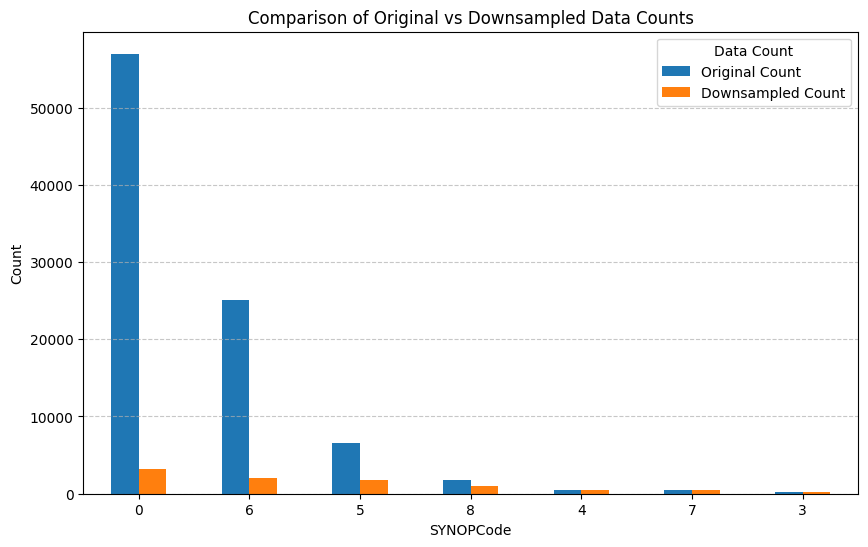

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the original and downsampled counts for each SYNOPCode
original_counts = data['SYNOPCode'].value_counts()
downsampled_counts = downsampled_data['SYNOPCode'].value_counts()

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Count': original_counts,
    'Downsampled Count': downsampled_counts
}).fillna(0).astype(int)

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Original vs Downsampled Data Counts')
plt.xlabel('SYNOPCode')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title='Data Count')
plt.show()
